**A — Output model using ambient temperature as external input**

- Identify stable modelling period (6–10 weeks).

- Validation set directly after modelling set.

- Test set: one week immediately after validation + one week from a different season.

- Build model, check residual whiteness, compare with naïve predictor.

- Produce stand-alone predictor function for Part A.

**B — Extended model using both ambient & supply water temperature**

- Re-estimate the model to include the second external input.

- Check residuals again, whiteness, comparison with naïve models.

- Produce stand-alone predictor function for Part B.

**C — Recursive estimation with Kalman filter**

- Recursively estimate parameters of model from Part B.

- Evaluate parameter evolution + recursive prediction quality.

- Check whether some parameters can be dropped.

- Produce stand-alone predictor function for Part C.

**D (Optional) — Automatic predictors**

- Prophet, NeuralProphet, TimeGPT, etc.

- Compare fairly (only modelling data allowed).

In [9]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd

# Load data
mat = loadmat("../data/projectData25.mat")
data = mat["data"]          # 5000 x 8 array

print(data.shape)           # should be (5000, 8)

# Put into a DataFrame
cols = ["obs", "power", "temp_ambient", "temp_supply",
        "year", "month", "day", "hour"]
df = pd.DataFrame(data, columns=cols)

df.head()


(5000, 8)


,obs,power,temp_ambient,temp_supply,year,month,day,hour
0,89.0,47.26,26.09,73.86,1989.0,7.0,6.0,17.0
1,90.0,46.77,25.86,73.23,1989.0,7.0,6.0,18.0
2,91.0,49.70,26.09,74.18,1989.0,7.0,6.0,19.0
3,92.0,52.06,25.66,74.70,1989.0,7.0,6.0,20.0
4,93.0,50.88,25.19,74.86,1989.0,7.0,6.0,21.0


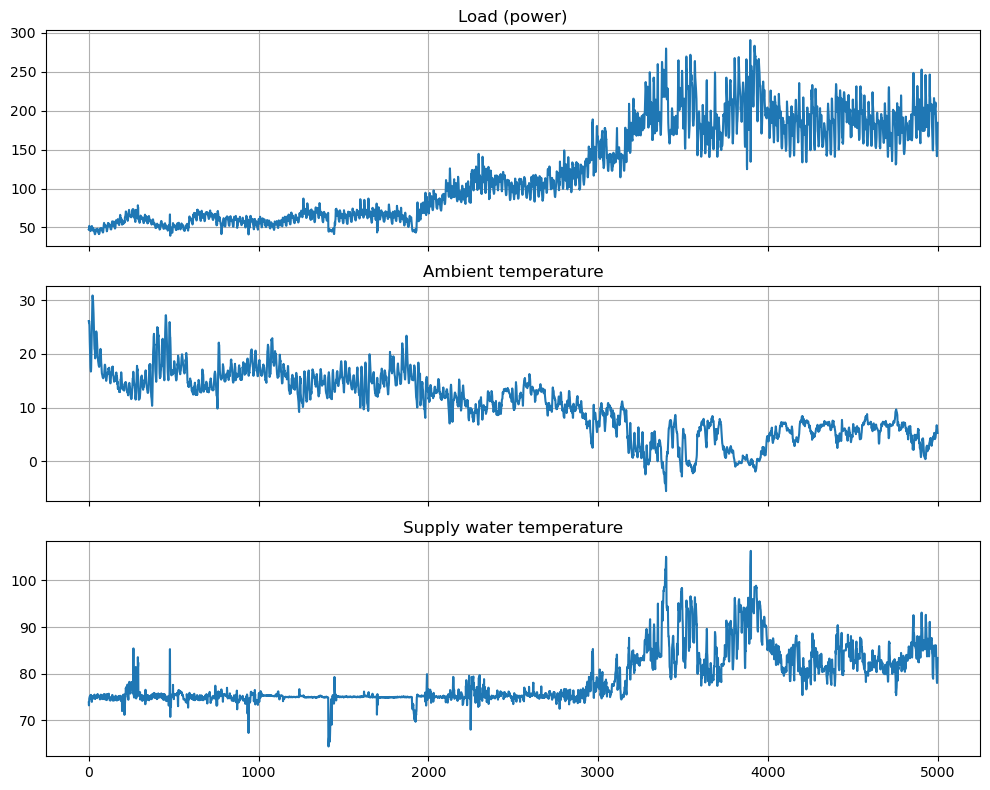

In [15]:
y  = df["power"].to_numpy()          # output
u1 = df["temp_ambient"].to_numpy()   # input 1
u2 = df["temp_supply"].to_numpy()    # input 2

#quick sanity check
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
axs[0].plot(y);  axs[0].set_title("Load (power)")
axs[1].plot(u1); axs[1].set_title("Ambient temperature")
axs[2].plot(u2); axs[2].set_title("Supply water temperature")
plt.tight_layout()
plt.show()